In [1]:
# import the necessary packages 
import numpy as np  #Used for numerical operations, such as array manipulation, matrix multiplication, and statistical calculations.
import pandas as pd #Used for data manipulation and analysis, including reading and writing data from various formats, data cleaning, data transformation, and data exploration.
import matplotlib.pyplot as plt #: Used for creating and displaying plots and visualizations, such as line charts, bar charts, scatter plots, and histograms.
import seaborn as sns #creating high-level statistical visualizations,
from matplotlib import gridspec # creating grid layouts for subplots, allowing for a more organized and structured layout of multiple visualizations.

In [2]:

# Load the dataset from the csv file using pandas 
# best way is to mount the drive on colab and  
# copy the path for the csv file 
#DataFrame is an efficient data structure that organizes data into rows and columns, making it easier to manipulate, analyze, and visualize.
#we took a dataset which had pca output in it
#actual data couldnt be shared in datset , the foll tabel has only dimensionaaly reduced data after performing PCA, output of pca is our dataset
data = pd.read_csv("creditcard.csv") 

In [3]:
#function in Pandas displays the first five rows of the DataFrame. , by default returns frst 5 rows

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Print the shape of the data 
# data = data.sample(frac = 0.1, random_state = 48) 
print(data.shape) #displaysdimensons of dataframe as a tuple, indicating number of rows n cols, basically gives idea of how large our dataset is
print(data.describe()) # generates a summary of the data's statistical properties, including measures of central tendency (mean, median, mode), measures of dispersion (standard deviation, variance, range), and quantiles (percentiles)
#characterisitics of data


(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [5]:
# Determine number of fraud cases in dataset 
#uses binary classifiction problem- study this

#these two lines craete 2 new DF by filtering original data
fraud = data[data['Class'] == 1] #rows where class colum is 1..indicated fraud transacrions
valid = data[data['Class'] == 0] #rows where class cloumn is 0 indicating valid transactions
outlierFraction = len(fraud)/float(len(valid)) #ratio of fraud to valid transactions, to understand imbalance in dataset
print(outlierFraction) #gives idea of how prevalent is fraud in datset compared gto valid transactions
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) #prints total number of fraud casess
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0]))) #ptrints total nimber of valid yransactions


0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [6]:
print("Amount details of the fraudulent transaction") 
fraud.Amount.describe() 


Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [7]:
print("Details of valid transaction") 
valid.Amount.describe() 

Details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

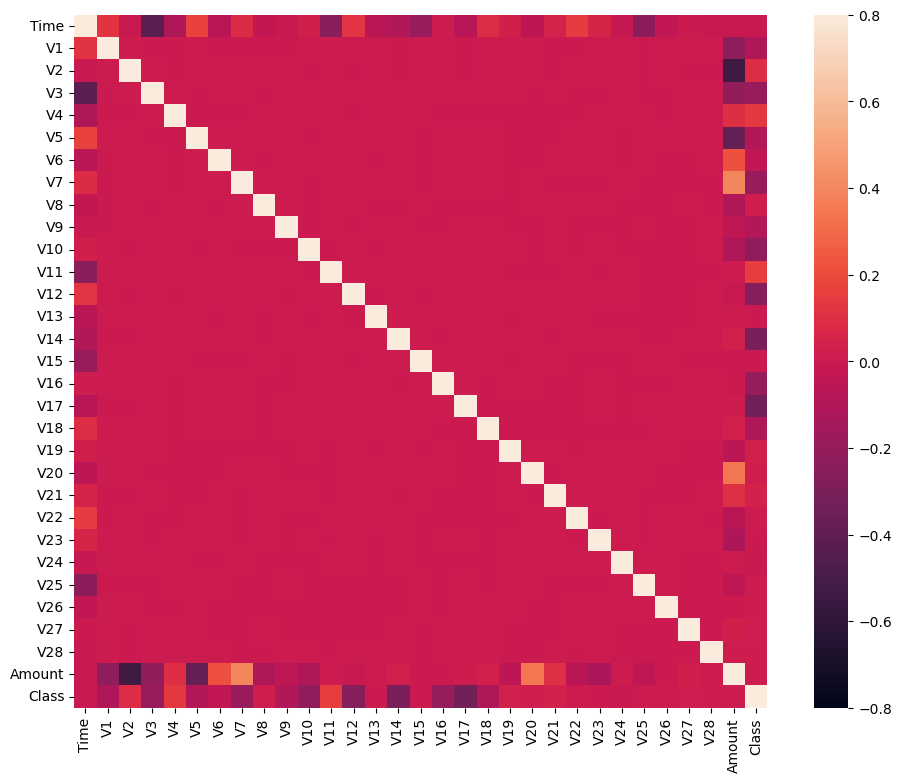

In [8]:
# Correlation matrix , const is corelation coeff
#correlation matrix shows how each variable is correlated with every other variable. The values in the matrix range from -1 to 1, where:
#1 indicates a perfect positive correlation,
#-1 indicates a perfect negative correlation
#0 indicates no correlation.
corrmat = data.corr() #above descriptiom
fig = plt.figure(figsize = (12, 9)) #e creates a Matplotlib figure with a specified size (12 inches in width and 9 inches in height).
sns.heatmap(corrmat, vmax = .8, vmin=-0.8,square = True) #Seaborn library to create a heatmap of the correlation matrix.The corrmat is the input data, vmax=.8 sets the maximum color intensity in the heatmap to 0.8, and square=True ensures that the cells in the heatmap are square.
plt.show() #displays the generated heatmap.


In [9]:
# dividing the X and the Y from the dataset 
X = data.drop(['Class'], axis = 1) #drops class column drom orginal data
Y = data["Class"] #Series Y containing the values of the 'Class' column from the original DataFrame data, represents target vafriable
print(X.shape) #prints number of samples(Rows) and  number of features(COls)
print(Y.shape) #number of rows
# getting just the values for the sake of processing 
# (its a numpy array with no columns) 
xData = X.values #convert data into numoy arrays because many machine learning libraries, such as scikit-learn, expect input data in the form of NumPy arrays. contains feature values
yData = Y.values #concerts into numpy array , 1D


(284807, 30)
(284807,)


In [10]:
# Using Scikit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split #this is used to split datasets into training and testing sets to train models
# Split the data into training and testing sets 

xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42) 
#20% dara used to test , rest 80% for training
#random seed is arbitrary, random_state is used to shuffle the order of data bfor splitting the data
#splitting of data ensures that the model is trained on a significant portion of the data while reserving a 
#separate set of data for evaluating its performance on unseen examples. This helps prevent overfitting and provides a more accurate assessment of the model's generalizability.

In [11]:
# Building the Random Forest Classifier (RANDOM FOREST) 
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier() #instance of class
rfc.fit(xTrain, yTrain) #trains it on training data,Build a forest of trees from the training set (X, y).
#fit takes 2 args- xtrain are feature values for trainign, ytrain target values for training
# predictions 
yPred = rfc.predict(xTest) #uses trained rfc model to make predictions on test dta


In [12]:
# Evaluating the classifier 
# printing every score of the classifier 
# scoring in anything 
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

n_outliers = len(fraud) #mnumber of frauds
n_errors = (yPred != yTest).sum() #number of errors in predictions
print("The model used is Random Forest classifier") 

#Out of all the instances, how many did the model predict correctly?"
acc = accuracy_score(yTest, yPred) #calculates accuracy of model, accuracy is ratio of correct pred to total instances
print("The accuracy is {}".format(acc)) 

#Out of all the instances predicted as positive, how many were actually positive?"
prec = precision_score(yTest, yPred) #ratio of true +ve pred to total predictued positives
print("The precision is {}".format(prec)) 

rec = recall_score(yTest, yPred) #atio of true positive predictions to the total actual positives.
print("The recall is {}".format(rec)) 

f1 = f1_score(yTest, yPred) #e harmonic mean of precision and recall
print("The F1-Score is {}".format(f1)) 

MCC = matthews_corrcoef(yTest, yPred) #measures the correlation between the observed and predicted binary classifications.
print("The Matthews correlation coefficient is{}".format(MCC)) 


The model used is Random Forest classifier
The accuracy is 0.9995611109160493
The precision is 0.974025974025974
The recall is 0.7653061224489796
The F1-Score is 0.8571428571428571
The Matthews correlation coefficient is0.8631826952924256


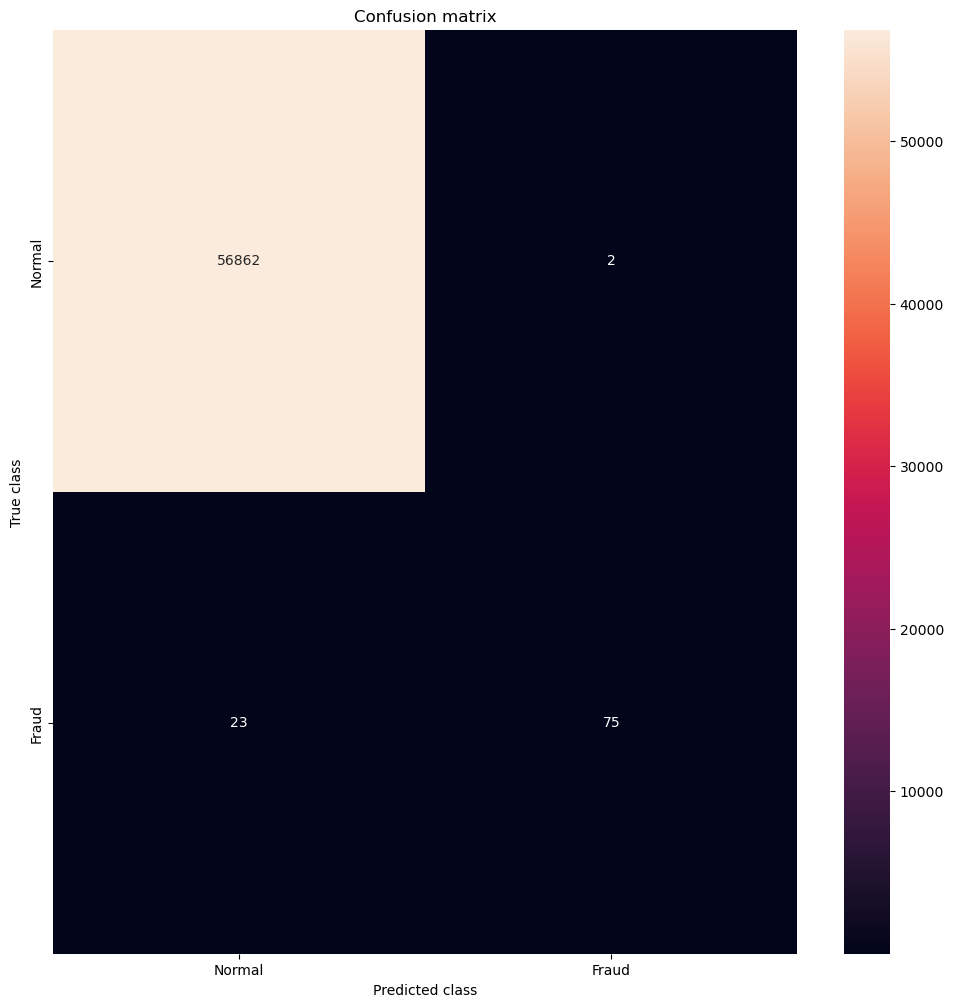

In [13]:
# generates and printing the confusion matrix for the rfc
#confusion matrix is a table that summarizes the performance of a classification model by comparing the predicted labels to the actual labels
LABELS = ['Normal', 'Fraud'] #defines the labels for the classes in the confusion matrix. 
conf_matrix = confusion_matrix(yTest, yPred) #calculates the confusion matrix using the confusion_matrix function from Scikit-learn. The confusion matrix is a table that shows the true positive, true negative, false positive, and false negative values.
plt.figure(figsize =(12, 12)) # creates a Matplotlib figure with a specified size for the heatmap.

#he xticklabels and yticklabels parameters set the labels for the x-axis and y-axis, and annot=True adds the numerical values in each cell of the heatmap. The fmt="d" specifies that the values should be displayed as integers.
sns.heatmap(conf_matrix, xticklabels = LABELS, 
			yticklabels = LABELS, annot = True, fmt ="d"); 

#set the title and labels for the axes of the heatmap.
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 
